In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

In [3]:
x = np.linspace(0,10,1000)

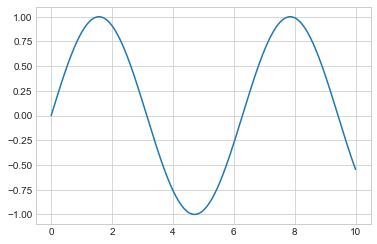

In [11]:
plt.plot(x,np.sin(x))
plt.show()

`If we want to create a single figure with multiple lines, we can simply call the plot function multiple times:`

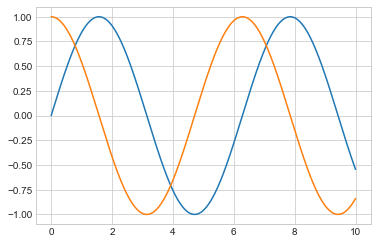

In [13]:
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

`Adjusting plot line colors`

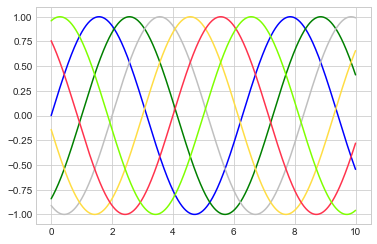

In [14]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names

`Adjusting plot line style`

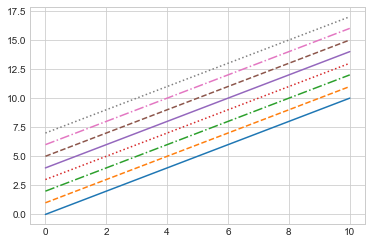

In [16]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

***If you would like to be extremely terse, these linestyle and color codes can be combined into a single non-keyword argument to the plt.plot() function:***

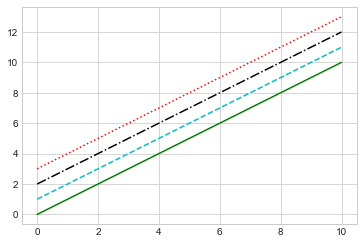

In [17]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

`In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ax.set() method to set all these properties at once:`

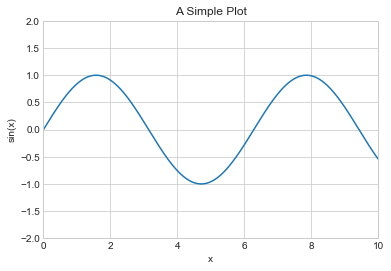

In [18]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot')

## Scatter plots

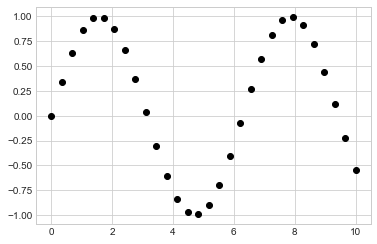

In [19]:
x = np.linspace(0,10,30)
y = np.sin(x)
plt.plot(x,y,'o',color='black')

*** Different types of markers***

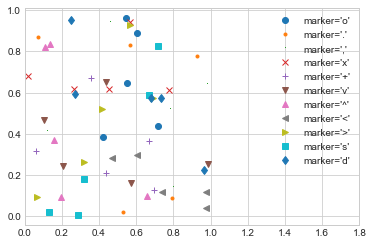

In [20]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8)

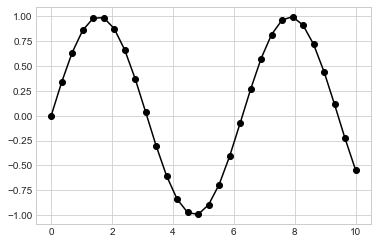

In [21]:
# Character codes can be used together with line and color code
plt.plot(x, y, '-ok')

`Additional arguments of plt.plot() gives wide range of properties`

(-1.2, 1.2)

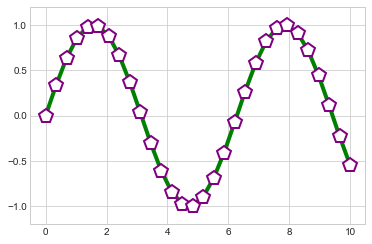

In [28]:
plt.plot(x, y, '-p', color='green',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='purple',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2)

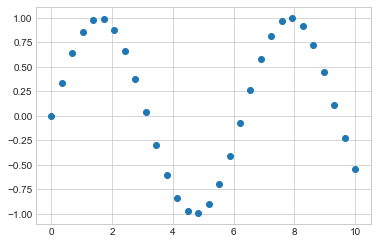

In [31]:
# Scatter plot with plt.scatter()
plt.scatter(x,y,marker='o')

** The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data. Let's see this**

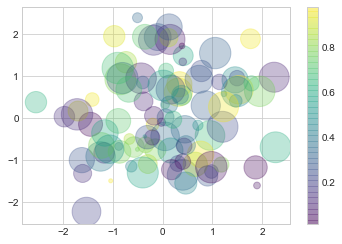

In [32]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

`For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:`

Text(0, 0.5, 'sepal width (cm)')

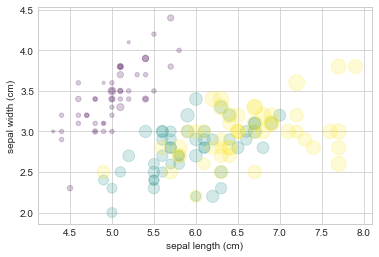

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

***Note on efficiency: plt.plot should be preferred over plt.scatter for large datasets.***

<ErrorbarContainer object of 3 artists>

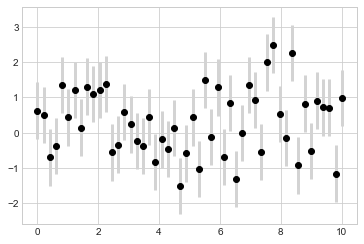

In [38]:
# Errorbar to show errors
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',ecolor='lightgray', elinewidth=3, capsize=0)

## Three dimension plotting

In [39]:
from mpl_toolkits import mplot3d

`Once this submodule is imported, a three-dimensional axes can be created by passing the keyword projection='3d' to any of the normal axes creation routines:`

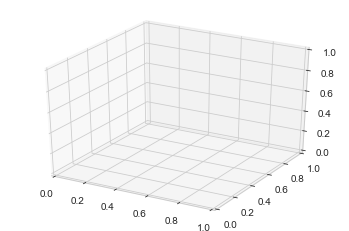

In [40]:
fig = plt.figure()
ax = plt.axes(projection='3d')

** 3d plots and lines **

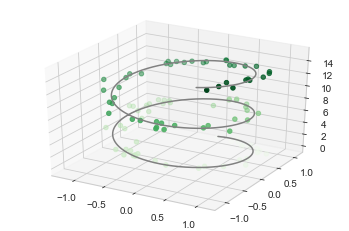

In [41]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

** 3d contour plots **

In [43]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Text(0.5, 0, 'z')

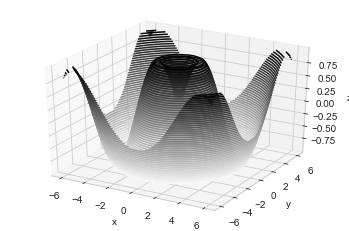

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

***Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):***

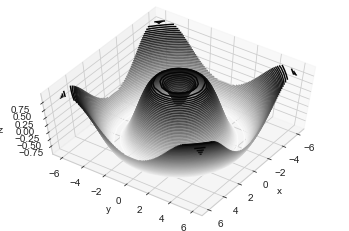

In [45]:
ax.view_init(60, 35)
fig

### Wireframe and Surface plots

Text(0.5, 0.92, 'wireframe')

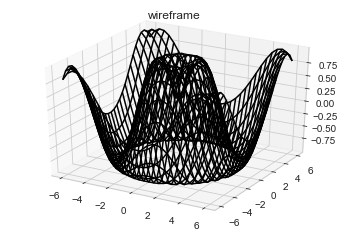

In [46]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')

Text(0.5, 0.92, 'surface')

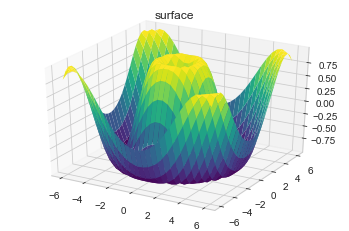

In [47]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')